In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [4]:
data = pd.read_csv("/Users/meenakshirana/Desktop/new take off folder/data science study udemy/S33_L204/1.03. Dummies.csv")

In [5]:
data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [6]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [7]:
y = data["GPA"]
x1 = data["SAT"]

In [8]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 02 May 2020   Prob (F-statistic):           7.20e-11
Time:                        15:56:52   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

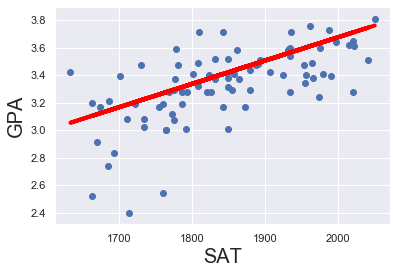

In [9]:
plt.scatter(data["SAT"],y)
yhat = .275 + 0.0017*data["SAT"]
fig = plt.plot(data["SAT"],yhat, lw = 4, c = "red")
plt.xlabel("SAT",fontsize = 20)
plt.ylabel("GPA",fontsize = 20)
plt.show()

In [10]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670]})
new_data = new_data[['const','SAT']]
new_data

,const,SAT
0,1,1700
1,1,1670


In [11]:
new_data.rename(index = {0:'BOB',1:'Alice'})

,const,SAT
BOB,1,1700
Alice,1,1670


In [13]:
predictions = result.predict(new_data)
predictions

0    3.089710
1    3.040039
dtype: float64

In [14]:
predictionsdf = pd.DataFrame({'predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0:'BOB',1:'Alice'})

,const,SAT,predictions
BOB,1,1700,3.089710
Alice,1,1670,3.040039
